In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import tensorflow as tf

In [2]:
df = pd.read_excel('../Data/Data_Train.xlsx')

## Preparation

In [3]:
#Functions
def BookType(x):
    y = x.split(',')[0]
    return y

def BookImport(x):
    y = x.split(',')[1]
    y = y.replace('– ', '')
    if y == 'Import':
        return 1
    else:
        return 0
    
def EditionSplit(x):
    split = x.split(',')
    booktype, *extra, date = [element.replace('- ', '').replace('– ', '') for element in split]
    return booktype, extra, date

def DateSplit(x):
    y = x.split()
    return y[-1]

def RatingSplit(x):
    y = x.split()
    y = y[0]
    return y

In [4]:
for index, row in df.iterrows():
    edition = row['Edition']
    x, y, z = EditionSplit(edition)
    df.at[index, 'Type'] = x
    if len(y) != 0:
        df.at[index, 'Extra'] = y[0]
    else:
        df.at[index, 'Extra'] = ''
    df.at[index, 'Date'] = z
    
df['Year'] = df['Date'].apply(DateSplit)

In [5]:
df.loc[df['Extra'] == '', 'Extra'] = np.nan

In [6]:
df['Rating'] = df['Reviews'].str[:3]

In [7]:
df['Number_of_Ratings'] = df['Ratings'].apply(RatingSplit)

df.loc[~df['Year'].str.isnumeric(), 'Extra 2'] = df.loc[~df['Year'].str.isnumeric()]['Year']
df.loc[~df['Year'].str.isnumeric(), 'Year'] = 0


In [8]:
df = df[['Author', 'Genre', 'BookCategory', 'Type', 'Extra', 'Extra 2', 'Year', 'Rating', 'Number_of_Ratings', 'Price']]

In [9]:
df['Year'] = df['Year'].astype(int)
df['Rating'] = df['Rating'].astype(float)
df['Number_of_Ratings'] = df['Number_of_Ratings'].str.replace(',', '').astype(int)

df['Extra'] = df['Extra'].fillna('None')
df['Extra 2'] = df['Extra 2'].fillna('None')

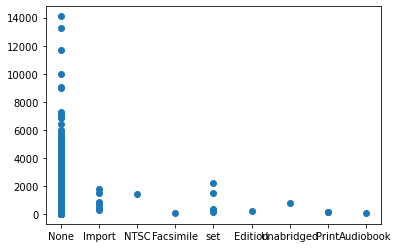

In [21]:
import matplotlib.pyplot as plt

plt.scatter(df['Extra 2'], df['Price'])

## Preprocessing

In [22]:
X = df.drop(columns=['Author','Price', 'Number_of_Ratings', 'Extra', 'Extra 2'])
X = pd.get_dummies(X)
y = df['Price']
numeric = X[['Year', 'Rating']]
dummies = X.drop(columns=['Year', 'Rating'])

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(numeric)
scaled_numeric = pd.DataFrame(scaled, columns=['Year', 'Rating'], index=X.index)



In [24]:
X = pd.concat([scaled_numeric, dummies], axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
predictions = model.predict(X_test)

predictions

array([501.58      , 230.8405    , 353.61289631, ..., 325.73756667,
       425.8613    , 386.64536667])

In [33]:
from sklearn.metrics import r2_score

r2_score(predictions, y_test)

-1.3012299541010681

In [30]:
prediction_df = pd.DataFrame({
    'Predictions': predictions,
    'True': y_test
})

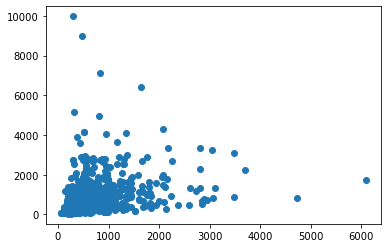